# Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import confusion_matrix,classification_report,accuracy_score







# Reading data

In [3]:
cab = pd.read_csv("YourCabs_training.csv")
cab.head(2)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.96691,77.74935,12.92768,77.62664,0


In [4]:
#!pip install pandas-profiling

In [5]:
#from pandas_profiling import ProfileReport

# Understanding data

In [6]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [7]:
# SHAPE OF DATA
cab.shape

(43431, 19)

In [8]:
#DEFINING FEATURES AND TARGET COLUMN
X = cab.drop(['id','Car_Cancellation'],axis=1)
y = cab['Car_Cancellation']

In [9]:
# FEATURES
X.head(2)

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.92415,77.67229,12.92732,77.63575
1,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.96691,77.74935,12.92768,77.62664


In [10]:
# TARGET VARIABLE DATA DISTRIBUTION
y.value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

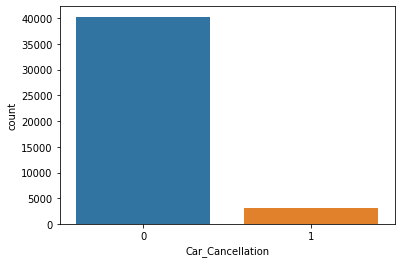

In [11]:
# COUNT OF TARGET VARIABLES
sns.countplot(y)
plt.show()

## Note - 92% of Target values are 0

### OVERSAMPLING DATA VALUE = 1 TO MAKE EQUAL RATIO WITH VALUE = 0

In [12]:
#pip install imblearn


In [13]:
#IMPORTING OVERSAMPLER
from imblearn.over_sampling import RandomOverSampler

#OVERSAMPLING NON-MAJORITY DATA
ros = RandomOverSampler(sampling_strategy="not majority")
X,y = ros.fit_resample(X,y)

In [14]:
y.value_counts()

0    40299
1    40299
Name: Car_Cancellation, dtype: int64

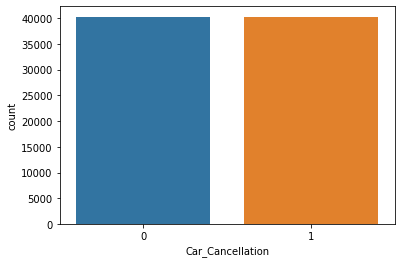

In [15]:
# COUNT OF TARGET VARIABLES
sns.countplot(y)
plt.show()

#### Note - Equal ratio of Target classes has been done by oversampling

# TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

# SPLITTING INTO 70-30 Ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
# TRAINING DATA
X_train.head(2)

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
36908,44664,12,NaN,2,1384.0,1262.0,15.0,NaN,10/9/2013 0:00,41556.05091,1,0,10/8/2013 19:49,13.02853,77.54625,12.81575,77.68465
47560,38175,12,1.0,3,212.0,NaN,NaN,NaN,8/18/2013 10:30,41504.64583,1,0,8/18/2013 8:05,12.99474,77.60797,NaN,NaN


In [18]:
# TESTING DATA
X_test.head(2)

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
1842,23377,12,NaN,2,1021.0,1053.0,NaN,NaN,2/14/2013 5:30,NaN,0,0,1/21/2013 13:53,13.028530,77.54625,12.912799,77.589784
59278,31386,12,1.0,3,814.0,NaN,NaN,NaN,5/20/2013 16:00,NaN,0,0,5/20/2013 10:22,12.908993,77.68890,NaN,NaN


In [19]:
# Typecasting from_date column into datetime format
X_train['from_date'] = pd.to_datetime(X_train['from_date'] ,errors='coerce')
X_test['from_date'] = pd.to_datetime(X_test['from_date'] ,errors='coerce')

# TYPECASTING to_date column into datetime format
X_train['to_date'] = pd.to_datetime(X_train['to_date'],errors='coerce')
X_test['to_date'] = pd.to_datetime(X_test['to_date'] ,errors='coerce')

# TYPECASTING booking_created column into datetime format
X_train['booking_created'] = pd.to_datetime(X_train['booking_created'],errors='coerce')
X_test['booking_created'] = pd.to_datetime(X_test['booking_created'] ,errors='coerce')


# CHECKING FOR NULL VALUES

### Training Data

In [20]:
# TRAINING DATA
print(X_train.isnull().sum()) #Actual count of Null Values
print()
print((X_train.isnull().sum()/X_train.shape[0])*100) #PERCENTAGE OF NULL VALUES

user_id                    0
vehicle_model_id           0
package_id             48335
travel_type_id             0
from_area_id              67
to_area_id              9336
from_city_id           31120
to_city_id             55165
from_date                  0
to_date                20910
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  70
from_long                 70
to_lat                  9336
to_long                 9336
dtype: int64

user_id                 0.000000
vehicle_model_id        0.000000
package_id             85.673012
travel_type_id          0.000000
from_area_id            0.118756
to_area_id             16.547910
from_city_id           55.159701
to_city_id             97.779078
from_date               0.000000
to_date                37.062640
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.124074
from_long               0.12407

In [21]:
# DROPPING COLUMNS HAVING GREATER THAN 10% OF MISSING VALUES FROM TRAINING SET 
X_train.drop(['package_id','to_area_id','from_city_id','to_city_id','to_date','to_lat','to_long'],axis =1 , inplace=True)

# Dropping same columns from the testing set
X_test.drop(['package_id','to_area_id','from_city_id','to_city_id','to_date','to_lat','to_long'],axis =1 , inplace=True)




In [22]:
# CHECKING COLUMNS OF TRAINING AND TESTING DATA 
print(X_train.columns)
print()
print()
print(X_test.columns)

Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long'],
      dtype='object')


Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long'],
      dtype='object')


In [23]:
# CHECKING NULL VALUES IN TRAINING DATA
X_train.isnull().sum()

user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id           67
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat               70
from_long              70
dtype: int64

### COLUMNS HAVING NULL VALUES -[ from_area_id , from_lat , from_long]

In [24]:
# CHECKING THE VALUES DISTRIBUTION IN THE COLUMN
X_train['from_area_id'].value_counts().head(5)

393.0     3652
571.0     2218
293.0     1587
83.0      1086
1010.0    1013
Name: from_area_id, dtype: int64

### As it is an id based column so we will impute null values with mode of the column

In [25]:
# 393.0 value repeats maximum times in from_area_id column

# Imputing 393.0 into from_area_id column
X_train['from_area_id'] = X_train['from_area_id'].fillna(value=393.0)

In [26]:
# CHECKING FOR NULL VALUES AGAIN
X_train.isnull().sum()

user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id            0
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat               70
from_long              70
dtype: int64

In [27]:
# from_lat column
X_train['from_lat'].describe()

count    56348.000000
mean        12.971808
std          0.081006
min         12.776630
25%         12.922100
50%         12.965190
75%         12.995170
max         13.366072
Name: from_lat, dtype: float64

In [28]:
# from_long 
X_train['from_long'].describe()

count    56348.000000
mean        77.640727
std          0.059500
min         77.386930
25%         77.599140
50%         77.645580
75%         77.691830
max         77.786420
Name: from_long, dtype: float64

In [29]:
# Imputing mean values in both the columns

X_train['from_lat'] = X_train['from_lat'].fillna(value=X_train['from_lat'].mean())
X_train['from_long'] = X_train['from_long'].fillna(value=X_train['from_long'].mean())


In [30]:
# CHECKING FOR NULL VALUES
X_train.isnull().sum()

user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
dtype: int64

### No Null values now in training data

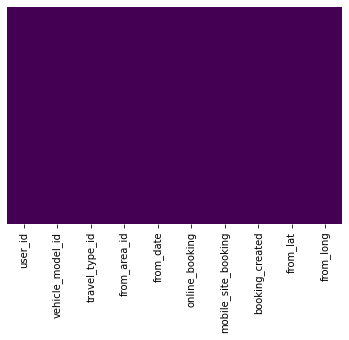

In [31]:
# HEATMAP FOR NULL VALUES IN TRAINING DATA
sns.heatmap(X_train.isnull(),cbar=False,cmap='viridis',yticklabels=False) #No missing value present in training set
plt.show()

### TESTING SET

In [32]:
# CHECKING FOR NULL VALUES
X_test.isnull().sum()

user_id                 0
vehicle_model_id        0
travel_type_id          0
from_area_id           44
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat               46
from_long              46
dtype: int64

In [33]:
# IMPUTING THE TEST SET NULL VALUES FROM TRAINING SET VALUES IN REQUIRED COLUMNS
X_test['from_area_id'] = X_test['from_area_id'].fillna(value=393.0)
X_test['from_lat'] = X_test['from_lat'].fillna(value=X_train['from_lat'].mean())
X_test['from_long'] = X_test['from_long'].fillna(value=X_train['from_long'].mean())


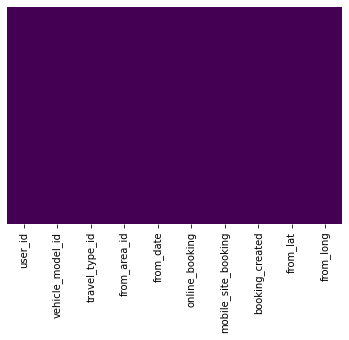

In [34]:
# HEATMAP FOR NULL VALUES IN TESTING SET
sns.heatmap(X_test.isnull(),cbar=False,cmap='viridis',yticklabels=False) #No missing value present in testing set
plt.show()

### No Null values in testing set

In [35]:
# ROWS * COLUMNS FOR TRAINING DATA
X_train.shape

(56418, 10)

In [36]:
# ROWS * COLUMNS FOR TESTING DATA
X_test.shape

(24180, 10)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56418 entries, 36908 to 15795
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              56418 non-null  int64         
 1   vehicle_model_id     56418 non-null  int64         
 2   travel_type_id       56418 non-null  int64         
 3   from_area_id         56418 non-null  float64       
 4   from_date            56418 non-null  datetime64[ns]
 5   online_booking       56418 non-null  int64         
 6   mobile_site_booking  56418 non-null  int64         
 7   booking_created      56418 non-null  datetime64[ns]
 8   from_lat             56418 non-null  float64       
 9   from_long            56418 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(5)
memory usage: 4.7 MB


# DATE AND TIME COLUMNS TREATMENT - TRAINING DATA

In [38]:
#BOOKING DATE - TRAINING DATA
X_train['Booking_year'] = X_train['booking_created'].dt.year #Creating Year column
X_train['Booking_month'] = X_train['booking_created'].dt.month #Creating Month Column
X_train['Booking_dom'] = X_train['booking_created'].dt.day #Creating DAY OF MONTH COLUMN
X_train['Booking_dow'] = X_train['booking_created'].dt.dayofweek #Day number in a 7-day week (Starting from Tuesday)
X_train['Booking_hour'] = X_train['booking_created'].dt.hour  #Hour of Time
X_train['Booking_minutes'] = X_train['booking_created'].dt.minute #Minute of Time

#TRIP DATE - TRAINING DATA
X_train['Year'] = X_train['from_date'].dt.year #Creating Year column
X_train['Month'] = X_train['from_date'].dt.month #Creating Month Column
X_train['Day of Month'] = X_train['from_date'].dt.day #Creating DAY OF MONTH COLUMN
X_train['Day of Week'] = X_train['from_date'].dt.dayofweek #Day number in a 7-day week (Starting from Tuesday)
X_train['Hour'] = X_train['from_date'].dt.hour  #Hour of Time
X_train['Minutes'] = X_train['from_date'].dt.minute #Minute of Time



# TIME DIFFERENCE BETWEEN BOOKING CREATED AND TRIP DAY - TRAINING DATA
X_train['Days_difference'] = (X_train['from_date'] - X_train['booking_created']).dt.days #Difference in days between booking and trip day





# DATE AND TIME COLUMNS TREATMENT -TESTING DATA

In [39]:
#BOOKING DATE - TRAINING DATA
X_test['Booking_year'] = X_test['booking_created'].dt.year #Creating Year column
X_test['Booking_month'] = X_test['booking_created'].dt.month #Creating Month Column
X_test['Booking_dom'] = X_test['booking_created'].dt.day #Creating DAY OF MONTH COLUMN
X_test['Booking_dow'] = X_test['booking_created'].dt.dayofweek #Day number in a 7-day week (Starting from Tuesday)
X_test['Booking_hour'] = X_test['booking_created'].dt.hour  #Hour of Time
X_test['Booking_minutes'] = X_test['booking_created'].dt.minute #Minute of Time

#TRIP DATE - TESTING DATA DATA
X_test['Year'] = X_test['from_date'].dt.year #Creating Year column
X_test['Month'] = X_test['from_date'].dt.month #Creating Month Column
X_test['Day of Month'] = X_test['from_date'].dt.day #Creating DAY OF MONTH COLUMN
X_test['Day of Week'] = X_test['from_date'].dt.dayofweek #Day number in a 7-day week (Starting from Tuesday)
X_test['Hour'] = X_test['from_date'].dt.hour  #Hour of Time
X_test['Minutes'] = X_test['from_date'].dt.minute #Minute of Time



# TIME DIFFERENCE BETWEEN BOOKING CREATED AND TRIP DAY - TRAINING DATA
X_test['Days_difference'] = (X_test['from_date'] - X_test['booking_created']).dt.days #Difference in days between booking and trip day


In [40]:
# TRAINING DATA AND TESTING DATA COLUMNS
print(X_train.columns)
print()
print(X_test.columns)
print(X_train.shape)
print(X_test.shape)

Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'Booking_year', 'Booking_month', 'Booking_dom',
       'Booking_dow', 'Booking_hour', 'Booking_minutes', 'Year', 'Month',
       'Day of Month', 'Day of Week', 'Hour', 'Minutes', 'Days_difference'],
      dtype='object')

Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'Booking_year', 'Booking_month', 'Booking_dom',
       'Booking_dow', 'Booking_hour', 'Booking_minutes', 'Year', 'Month',
       'Day of Month', 'Day of Week', 'Hour', 'Minutes', 'Days_difference'],
      dtype='object')
(56418, 23)
(24180, 23)


# OUTLIER TREATMENT

In [41]:
# CHECKING TRAINING DATA COLUMNS
X_train.columns

Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'from_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'Booking_year', 'Booking_month', 'Booking_dom',
       'Booking_dow', 'Booking_hour', 'Booking_minutes', 'Year', 'Month',
       'Day of Month', 'Day of Week', 'Hour', 'Minutes', 'Days_difference'],
      dtype='object')

## from_lat column outlier treatment

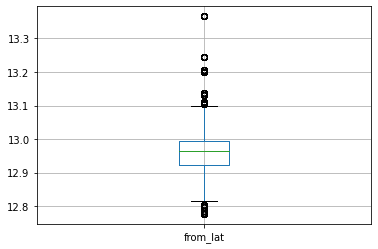

In [42]:
X_train.boxplot('from_lat')
plt.show()

In [43]:
X_train['from_lat'].describe()

count    56418.000000
mean        12.971808
std          0.080956
min         12.776630
25%         12.922100
50%         12.965190
75%         12.995170
max         13.366072
Name: from_lat, dtype: float64

In [45]:
X_train['from_lat'].std()

0.08095605978238007

In [47]:
# MEAN >= 3*S.D

In [46]:
# TRAINING SET - MEAN METHOD
mean_ul = (X_train['from_lat'].mean()) + (3* X_train['from_lat'].std())
mean_ll = (X_train['from_lat'].mean()) - (3* X_train['from_lat'].std())

ul_outlier_count = X_train[X_train['from_lat'] > mean_ul].shape[0]
ll_outlier_count = X_train[X_train['from_lat'] < mean_ll].shape[0]
total_outliers = ul_outlier_count + ll_outlier_count
outlier_perc = total_outliers/X_train.shape[0]
print(f"Mean upper limit :{mean_ul}")
print(f"Mean Lower Limit :{mean_ll}")
print(f"Outliers above upper limit :{ul_outlier_count}")
print(f"Outliers below lower limit :{ll_outlier_count}")
print(f"Percentage of outliers :{outlier_perc}")

Mean upper limit :13.21467587154562
Mean Lower Limit :12.72893951285134
Outliers above upper limit :55
Outliers below lower limit :0
Percentage of outliers :0.000974866177461094


In [49]:
# TRAINING SET - IMPUTING VALUES
X_train['from_lat'].loc[X_train['from_lat'] > mean_ul] = mean_ul

In [50]:
# TRAINING SET - OUTLIER COUNT AFTER IMPUTING VALUES
print(X_train[X_train['from_lat'] > mean_ul].shape[0]) 
print(X_train[X_train['from_lat'] < mean_ll].shape[0])

0
0


In [51]:
# TESTING SET - MEAN METHOD
mean_ul_test = (X_train['from_lat'].mean()) + (3* X_train['from_lat'].std()) #SAME AS TRAINING DATA 
mean_ll_test = (X_train['from_lat'].mean()) - (3* X_train['from_lat'].std()) #SAME AS TRAINING DATA

ul_outlier_count_test = X_test[X_test['from_lat'] > mean_ul_test].shape[0]
ll_outlier_count_test = X_test[X_test['from_lat'] < mean_ll_test].shape[0]
total_outliers_test = ul_outlier_count_test + ll_outlier_count_test
outlier_perc_test = total_outliers_test/X_test.shape[0]
print(f"Mean upper limit :{mean_ul_test}")
print(f"Mean Lower Limit :{mean_ll_test}")
print(f"Outliers above upper limit :{ul_outlier_count_test}")
print(f"Outliers below lower limit :{ll_outlier_count_test}")
print(f"Percentage of outliers :{outlier_perc_test}")

Mean upper limit :13.213593937536405
Mean Lower Limit :12.72984770050071
Outliers above upper limit :20
Outliers below lower limit :0
Percentage of outliers :0.0008271298593879239


In [52]:
# TESTING SET - IMPUTING VALUES
X_test['from_lat'].loc[X_test['from_lat'] > mean_ul_test] = mean_ul_test

In [53]:
# TESTING SET - OUTLIER COUNT AFTER IMPUTING VALUES
print(X_test[X_test['from_lat'] > mean_ul_test].shape[0]) 
print(X_test[X_test['from_lat'] < mean_ll_test].shape[0])

0
0


## from_long column outlier treatment

<AxesSubplot:>

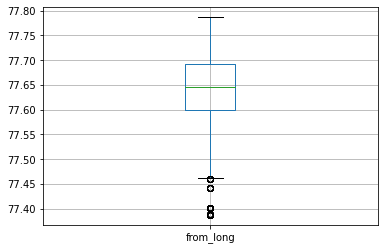

In [54]:
X_train.boxplot('from_long')

In [55]:
#STATISTICAL SUMMARY OF TRAINING SET 
X_train['from_long'].describe()

count    56418.000000
mean        77.640727
std          0.059463
min         77.386930
25%         77.599140
50%         77.645580
75%         77.691830
max         77.786420
Name: from_long, dtype: float64

In [56]:
#MEAN > 3*S.D

In [58]:
#TRAINING SET - MEAN METHOD
mean_ul = (X_train['from_long'].mean()) + (3* X_train['from_long'].std())
mean_ll = (X_train['from_long'].mean()) - (3* X_train['from_long'].std())

ul_outlier_count = X_train[X_train['from_long'] > mean_ul].shape[0]
ll_outlier_count = X_train[X_train['from_long'] < mean_ll].shape[0]
total_outliers = ul_outlier_count + ll_outlier_count
outlier_perc = total_outliers/X_train.shape[0]
print(f"Mean upper limit :{mean_ul}")
print(f"Mean Lower Limit :{mean_ll}")
print(f"Outliers above upper limit :{ul_outlier_count}")
print(f"Outliers below lower limit :{ll_outlier_count}")
print(f"Percentage of outliers :{outlier_perc}")

Mean upper limit :77.81911518809065
Mean Lower Limit :77.46233898252765
Outliers above upper limit :0
Outliers below lower limit :162
Percentage of outliers :0.002871424013612677


In [59]:
# TRAINING SET - IMPUTING VALUES
X_train['from_long'].loc[X_train['from_long'] < mean_ll] = mean_ll

In [60]:
# TRAINING SET - OUTLIER COUNT AFTER IMPUTING VALUES
print(X_train[X_train['from_long'] > mean_ul].shape[0]) 
print(X_train[X_train['from_long'] < mean_ll].shape[0])

0
0


In [61]:
# TESTING SET - MEAN METHOD
mean_ul_test = (X_train['from_long'].mean()) + (3* X_train['from_long'].std())  #SAME AS TRAINING DATA 
mean_ll_test = (X_train['from_long'].mean()) - (3* X_train['from_long'].std()) #SAME AS TRAINING DATA

ul_outlier_count_test = X_test[X_test['from_long'] > mean_ul_test].shape[0]
ll_outlier_count_test = X_test[X_test['from_long'] < mean_ll_test].shape[0]
total_outliers_test = ul_outlier_count_test + ll_outlier_count_test
outlier_perc_test = total_outliers_test/X_test.shape[0]
print(f"Mean upper limit :{mean_ul_test}")
print(f"Mean Lower Limit :{mean_ll_test}")
print(f"Outliers above upper limit :{ul_outlier_count_test}")
print(f"Outliers below lower limit :{ll_outlier_count_test}")
print(f"Percentage of outliers :{outlier_perc_test}")

Mean upper limit :77.81757461024148
Mean Lower Limit :77.46419733013713
Outliers above upper limit :0
Outliers below lower limit :71
Percentage of outliers :0.00293631100082713


In [62]:
# TESTING SET - IMPUTING VALUES
X_test['from_long'].loc[X_test['from_long'] < mean_ll_test] = mean_ll_test

In [63]:
# TESTING SET - OUTLIER COUNT AFTER IMPUTING VALUES
print(X_test[X_test['from_long'] > mean_ul_test].shape[0]) 
print(X_test[X_test['from_long'] < mean_ll_test].shape[0])

0
0


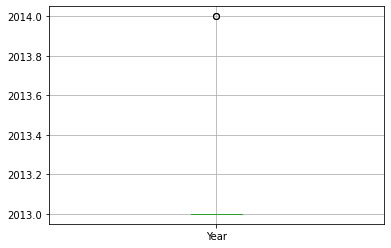

In [64]:
X_train.boxplot('Year')
plt.show()

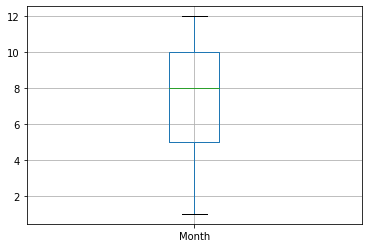

In [65]:
X_train.boxplot('Month')
plt.show()

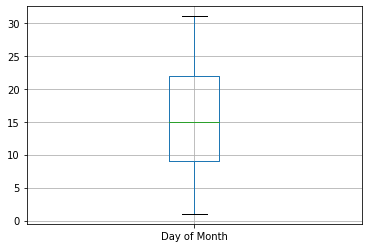

In [66]:
X_train.boxplot('Day of Month')
plt.show()

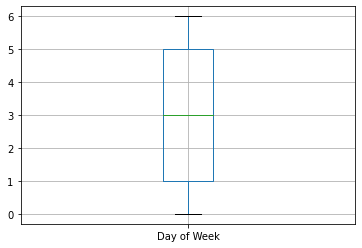

In [67]:
X_train.boxplot('Day of Week')
plt.show()

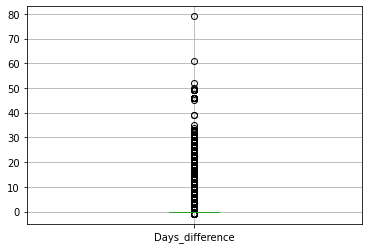

In [68]:
X_train.boxplot('Days_difference')
plt.show()

# VALUE COUNTS PER COLUMN

In [69]:
#USER ID
print(X_train['user_id'].value_counts())
print((X_train['user_id'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


29648    789
34972    336
27458    328
32527    265
38538    226
        ... 
4872       1
26560      1
42980      1
30535      1
26141      1
Name: user_id, Length: 17678, dtype: int64
29648    1.398490
34972    0.595555
27458    0.581375
32527    0.469708
38538    0.400581
           ...   
4872     0.001772
26560    0.001772
42980    0.001772
30535    0.001772
26141    0.001772
Name: user_id, Length: 17678, dtype: float64


In [70]:
print(X_train['user_id'].value_counts())
print((X_train['user_id'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


29648    789
34972    336
27458    328
32527    265
38538    226
        ... 
4872       1
26560      1
42980      1
30535      1
26141      1
Name: user_id, Length: 17678, dtype: int64
29648    1.398490
34972    0.595555
27458    0.581375
32527    0.469708
38538    0.400581
           ...   
4872     0.001772
26560    0.001772
42980    0.001772
30535    0.001772
26141    0.001772
Name: user_id, Length: 17678, dtype: float64


In [71]:
#VEHICLE ID
print(X_train['vehicle_model_id'].value_counts())
print((X_train['vehicle_model_id'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


12    44426
89     4165
28     1829
65     1792
85     1778
24     1076
87      554
90      221
23      192
86       85
10       75
64       59
54       52
91       40
17       31
30       13
13       13
36        7
72        2
1         2
43        1
75        1
69        1
39        1
14        1
70        1
Name: vehicle_model_id, dtype: int64
12    78.744372
89     7.382396
28     3.241873
65     3.176291
85     3.151476
24     1.907193
87     0.981956
90     0.391719
23     0.340317
86     0.150661
10     0.132936
64     0.104577
54     0.092169
91     0.070899
17     0.054947
30     0.023042
13     0.023042
36     0.012407
72     0.003545
1      0.003545
43     0.001772
75     0.001772
69     0.001772
39     0.001772
14     0.001772
70     0.001772
Name: vehicle_model_id, dtype: float64


In [72]:
print(X_train['travel_type_id'].value_counts())
print((X_train['travel_type_id'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


2    47081
3     8083
1     1254
Name: travel_type_id, dtype: int64
2    83.450317
3    14.326988
1     2.222695
Name: travel_type_id, dtype: float64


In [73]:
print(X_train['from_area_id'].value_counts())
print((X_train['from_area_id'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


393.0     3719
571.0     2218
293.0     1587
83.0      1086
1010.0    1013
          ... 
1206.0       1
1271.0       1
549.0        1
770.0        1
1014.0       1
Name: from_area_id, Length: 579, dtype: int64
393.0     6.591868
571.0     3.931369
293.0     2.812932
83.0      1.924918
1010.0    1.795526
            ...   
1206.0    0.001772
1271.0    0.001772
549.0     0.001772
770.0     0.001772
1014.0    0.001772
Name: from_area_id, Length: 579, dtype: float64


In [74]:
print(X_train['online_booking'].value_counts())
print((X_train['online_booking'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


0    29974
1    26444
Name: online_booking, dtype: int64
0    53.128434
1    46.871566
Name: online_booking, dtype: float64


In [75]:
print(X_train['mobile_site_booking'].value_counts())
print((X_train['mobile_site_booking'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


0    52776
1     3642
Name: mobile_site_booking, dtype: int64
0    93.544613
1     6.455387
Name: mobile_site_booking, dtype: float64


In [76]:
# DROPPING MOBILE SITE BOOKING COLUMN AS 93% DATA BELONGS TO 0 Value
X_train.drop(['mobile_site_booking'],axis=1,inplace=True)
X_test.drop(['mobile_site_booking'],axis=1,inplace=True)

In [77]:
print(X_train['from_lat'].value_counts())
print((X_train['from_lat'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


13.199560    3652
12.951850    2218
12.849482    1587
12.924150    1484
12.966910    1029
             ... 
13.092630       1
12.957324       1
12.989535       1
12.998700       1
12.967150       1
Name: from_lat, Length: 450, dtype: int64
13.199560    6.473111
12.951850    3.931369
12.849482    2.812932
12.924150    2.630366
12.966910    1.823886
               ...   
13.092630    0.001772
12.957324    0.001772
12.989535    0.001772
12.998700    0.001772
12.967150    0.001772
Name: from_lat, Length: 450, dtype: float64


In [78]:
print(X_train['from_long'].value_counts())
print((X_train['from_long'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


77.706880    3686
77.696420    2218
77.663187    1587
77.672290    1484
77.749350    1029
             ... 
77.586480       1
77.644600       1
77.594917       1
77.526880       1
77.607910       1
Name: from_long, Length: 442, dtype: int64
77.706880    6.533376
77.696420    3.931369
77.663187    2.812932
77.672290    2.630366
77.749350    1.823886
               ...   
77.586480    0.001772
77.644600    0.001772
77.594917    0.001772
77.526880    0.001772
77.607910    0.001772
Name: from_long, Length: 442, dtype: float64


In [79]:
print(X_train['Year'].value_counts())
print((X_train['Year'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


2013    56416
2014        2
Name: Year, dtype: int64
2013    99.996455
2014     0.003545
Name: Year, dtype: float64


In [80]:
# DROPPING YEAR COLUMN AS 2013 HAVE 99% DATA
X_train.drop('Year',axis=1,inplace=True)
X_test.drop('Year',axis=1,inplace=True)

In [81]:
print(X_train['Month'].value_counts())
print((X_train['Month'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


10    8724
5     7291
11    7031
9     6605
8     5894
6     5733
7     4369
4     3419
2     2622
3     2441
1     2276
12      13
Name: Month, dtype: int64
10    15.463150
5     12.923181
11    12.462335
9     11.707257
8     10.447020
6     10.161651
7      7.743982
4      6.060123
2      4.647453
3      4.326633
1      4.034173
12     0.023042
Name: Month, dtype: float64


In [82]:
print(X_train['Day of Month'].value_counts())
print((X_train['Day of Month'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


12    2757
13    2728
14    2626
1     2596
10    2201
11    2154
19    1976
15    1950
2     1912
20    1869
31    1750
6     1738
16    1733
9     1712
21    1711
18    1697
25    1686
22    1683
26    1679
24    1665
17    1638
23    1619
3     1618
8     1608
28    1517
30    1510
5     1502
7     1490
4     1418
27    1399
29    1276
Name: Day of Month, dtype: int64
12    4.886738
13    4.835336
14    4.654543
1     4.601368
10    3.901237
11    3.817930
19    3.502428
15    3.456344
2     3.388989
20    3.312773
31    3.101847
6     3.080577
16    3.071715
9     3.034493
21    3.032720
18    3.007905
25    2.988408
22    2.983091
26    2.976001
24    2.951186
17    2.903329
23    2.869652
3     2.867879
8     2.850154
28    2.688858
30    2.676451
5     2.662271
7     2.641001
4     2.513382
27    2.479705
29    2.261690
Name: Day of Month, dtype: float64


In [83]:
print(X_train['Day of Week'].value_counts())
print((X_train['Day of Week'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


4    9643
6    9018
5    8743
0    8149
3    7620
2    6788
1    6457
Name: Day of Week, dtype: int64
4    17.092063
6    15.984260
5    15.496827
0    14.443972
3    13.506328
2    12.031621
1    11.444929
Name: Day of Week, dtype: float64


In [84]:
print(X_train['Hour'].value_counts())
print((X_train['Hour'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


18    4795
17    4254
8     3950
19    3887
9     3533
7     3320
20    3265
6     2481
16    2448
10    2316
21    2293
5     2136
22    2111
15    2026
4     1940
12    1936
11    1885
23    1655
14    1558
13    1557
3     1551
0      646
2      499
1      376
Name: Hour, dtype: int64
18    8.499061
17    7.540147
8     7.001312
19    6.889645
9     6.262186
7     5.884647
20    5.787160
6     4.397533
16    4.339041
10    4.105073
21    4.064306
5     3.786026
22    3.741714
15    3.591053
4     3.438619
12    3.431529
11    3.341132
23    2.933461
14    2.761530
13    2.759758
3     2.749123
0     1.145025
2     0.884469
1     0.666454
Name: Hour, dtype: float64


In [85]:
print(X_train['Minutes'].value_counts())
print((X_train['Minutes'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


0     21445
30    17157
15     9098
45     8718
Name: Minutes, dtype: int64
0     38.010919
30    30.410507
15    16.126059
45    15.452515
Name: Minutes, dtype: float64


In [86]:
print(X_train['Booking_year'].value_counts())
print((X_train['Booking_year'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


2013    56418
Name: Booking_year, dtype: int64
2013    100.0
Name: Booking_year, dtype: float64


In [87]:
# DROPPING BOOKING YEAR COLUMN 
X_train.drop('Booking_year',axis=1,inplace=True)
X_test.drop('Booking_year',axis=1,inplace =True)

In [88]:
print(X_train['Booking_month'].value_counts())
print((X_train['Booking_month'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


10    10215
5      7615
9      6656
8      6030
6      5475
11     5185
7      4386
4      3404
2      2610
3      2506
1      2336
Name: Booking_month, dtype: int64
10    18.105924
5     13.497465
9     11.797653
8     10.688078
6      9.704350
11     9.190329
7      7.774115
4      6.033535
2      4.626183
3      4.441845
1      4.140523
Name: Booking_month, dtype: float64


In [89]:
print(X_train['Booking_dom'].value_counts())
print((X_train['Booking_dom'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


31    3631
12    2742
13    2714
14    2566
1     2281
11    2272
10    2177
2     1901
9     1841
6     1810
15    1805
20    1787
30    1785
8     1704
18    1691
16    1664
19    1662
23    1607
25    1591
22    1578
4     1540
17    1531
24    1486
5     1474
3     1453
21    1440
7     1422
27    1397
26    1378
28    1368
29    1120
Name: Booking_dom, dtype: int64
31    6.435889
12    4.860151
13    4.810521
14    4.548194
1     4.043036
11    4.027084
10    3.858698
2     3.369492
9     3.263143
6     3.208196
15    3.199334
20    3.167429
30    3.163884
8     3.020313
18    2.997270
16    2.949413
19    2.945868
23    2.848382
25    2.820022
22    2.796980
4     2.729625
17    2.713673
24    2.633911
5     2.612641
3     2.575419
21    2.552377
7     2.520472
27    2.476160
26    2.442483
28    2.424758
29    1.985182
Name: Booking_dom, dtype: float64


In [90]:
print(X_train['Booking_dow'].value_counts())
print((X_train['Booking_dow'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


4    9603
6    9149
3    8968
5    8489
0    7076
2    7045
1    6088
Name: Booking_dow, dtype: int64
4    17.021163
6    16.216456
3    15.895636
5    15.046616
0    12.542096
2    12.487149
1    10.790882
Name: Booking_dow, dtype: float64


In [91]:
print(X_train['Booking_hour'].value_counts())
print((X_train['Booking_hour'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


10    4063
17    3702
15    3666
19    3585
14    3538
12    3490
16    3461
18    3451
11    3436
20    3274
13    3185
21    2968
22    2731
9     2638
23    2259
8     1869
0     1515
7     1299
1      869
6      465
2      410
5      220
4      179
3      145
Name: Booking_hour, dtype: int64
10    7.201602
17    6.561736
15    6.497926
19    6.354355
14    6.271048
12    6.185969
16    6.134567
18    6.116842
11    6.090255
20    5.803112
13    5.645361
21    5.260732
22    4.840654
9     4.675813
23    4.004041
8     3.312773
0     2.685313
7     2.302457
1     1.540289
6     0.824205
2     0.726718
5     0.389946
4     0.317275
3     0.257010
Name: Booking_hour, dtype: float64


In [92]:
print(X_train['Booking_minutes'].value_counts())
print((X_train['Booking_minutes'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


11    1119
43    1117
13    1113
30    1110
31    1086
29    1086
46    1068
14    1041
12    1036
19    1024
17    1022
24    1019
42    1010
39    1006
59    1005
26    1004
9      998
3      996
58     992
47     981
27     975
15     965
7      962
52     955
55     954
45     948
28     938
37     935
23     931
18     924
56     923
33     921
20     921
38     918
16     915
34     912
53     910
41     906
25     905
35     903
57     902
50     898
2      897
44     897
21     871
22     869
36     865
40     856
51     852
10     848
8      844
54     844
0      844
5      843
49     840
48     823
32     821
1      804
6      795
4      751
Name: Booking_minutes, dtype: int64
11    1.983410
43    1.979865
13    1.972775
30    1.967457
31    1.924918
29    1.924918
46    1.893013
14    1.845156
12    1.836293
19    1.815024
17    1.811479
24    1.806161
42    1.790209
39    1.783119
59    1.781346
26    1.779574
9     1.768939
3     1.765394
58    1.758304
47    1.738807
27  

In [93]:
print(X_train['Days_difference'].value_counts())
print((X_train['Days_difference'].value_counts()/X_train.shape[0])*100) #PERCENTAGE OF EACH VALUE


 0     47439
 1      3052
 2      1027
 3       632
 4       469
 6       393
 5       286
 7       230
 18      224
 27      171
 20      162
 8       151
 25      150
 19      147
 17      145
 28      137
 13      130
 12      129
 9       129
 11      121
 21      119
 26      111
 15      108
 22      105
 10      104
 16       99
 14       97
 24       92
 29       85
 23       46
 30       39
-1        34
 33       14
 46       11
 31        9
 49        7
 32        5
 39        2
 50        1
 61        1
 79        1
 35        1
 45        1
 34        1
 52        1
Name: Days_difference, dtype: int64
 0     84.084867
 1      5.409621
 2      1.820341
 3      1.120210
 4      0.831295
 6      0.696586
 5      0.506930
 7      0.407671
 18     0.397036
 27     0.303095
 20     0.287142
 8      0.267645
 25     0.265873
 19     0.260555
 17     0.257010
 28     0.242830
 13     0.230423
 12     0.228650
 9      0.228650
 11     0.214471
 21     0.210926
 26     0.196746
 15  

# CORRELATION ANALYSIS

## TRAINING DATA

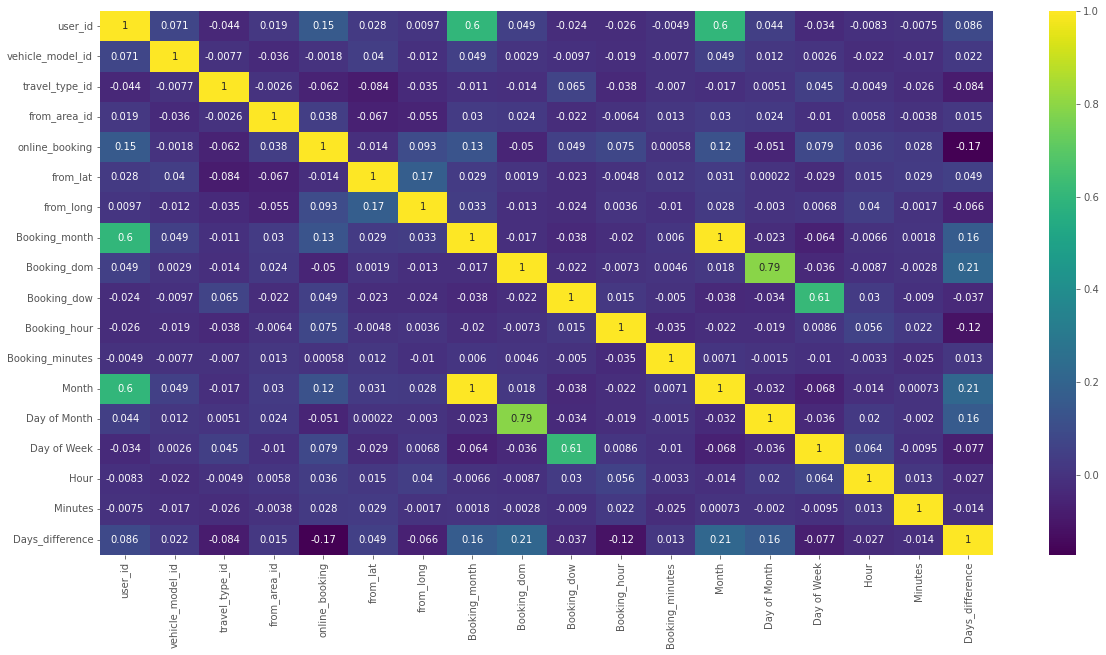

In [94]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.heatmap(X_train.corr(),annot=True,cmap='viridis')
plt.show()

In [95]:
# DROPPING COLUMNS BASED ON STRONG CORRELATION
X_train.drop(['Booking_month','Booking_dom'],axis=1,inplace=True)
X_test.drop(['Booking_month','Booking_dom'],axis=1,inplace=True)

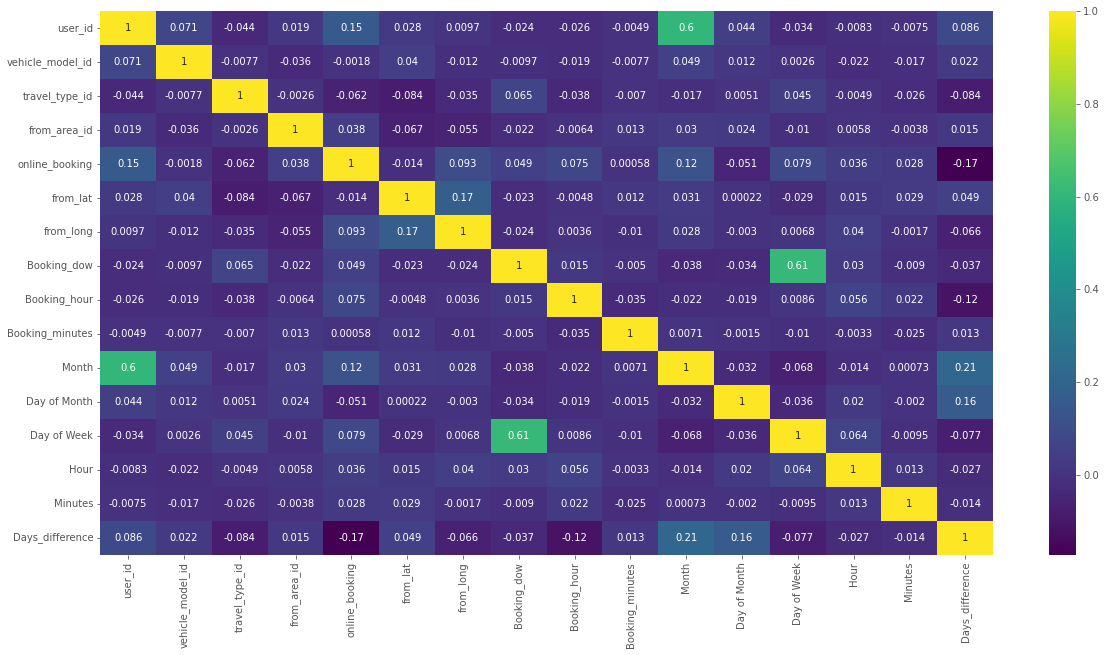

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap='viridis')
plt.show()

In [97]:
X_train.shape

(56418, 18)

In [98]:
X_test.shape

(24180, 18)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56418 entries, 36908 to 15795
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           56418 non-null  int64         
 1   vehicle_model_id  56418 non-null  int64         
 2   travel_type_id    56418 non-null  int64         
 3   from_area_id      56418 non-null  float64       
 4   from_date         56418 non-null  datetime64[ns]
 5   online_booking    56418 non-null  int64         
 6   booking_created   56418 non-null  datetime64[ns]
 7   from_lat          56418 non-null  float64       
 8   from_long         56418 non-null  float64       
 9   Booking_dow       56418 non-null  int64         
 10  Booking_hour      56418 non-null  int64         
 11  Booking_minutes   56418 non-null  int64         
 12  Month             56418 non-null  int64         
 13  Day of Month      56418 non-null  int64         
 14  Day of Week       

In [100]:
# DROPPING COLUMNS WHICH ARE NOT REQUIRED IN ML MODEL
X_train.drop(['from_date','booking_created'],axis=1,inplace=True)
X_test.drop(['from_date','booking_created'],axis=1,inplace=True)

In [101]:
X_train.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,online_booking,from_lat,from_long,Booking_dow,Booking_hour,Booking_minutes,Month,Day of Month,Day of Week,Hour,Minutes,Days_difference
36908,44664,12,2,1384.0,1,13.02853,77.54625,1,19,49,10,9,2,0,0,0
47560,38175,12,3,212.0,1,12.99474,77.60797,6,8,5,8,18,6,10,30,0


In [102]:
X_train.shape

(56418, 16)

In [103]:
X_test.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,online_booking,from_lat,from_long,Booking_dow,Booking_hour,Booking_minutes,Month,Day of Month,Day of Week,Hour,Minutes,Days_difference
1842,23377,12,2,1021.0,0,13.028530,77.54625,0,13,53,2,14,3,5,30,23
59278,31386,12,3,814.0,0,12.908993,77.68890,0,10,22,5,20,0,16,0,0


In [104]:
X_test.shape

(24180, 16)

# DATA SCALING

In [105]:
from sklearn.preprocessing import StandardScaler

#INITIALIZING STANDARD SCALER
ss = StandardScaler()

#MAKING COPY OF TRAINING AND TESTING SETS
train_ss = X_train.copy()
test_ss = X_test.copy()

In [106]:
#SCALING TRAINING SET
X_train_scaled = ss.fit_transform(train_ss)

In [107]:
#SCALING TESTING SET
X_test_scaled = ss.transform(test_ss)

In [108]:
#CONVERTING INTO DATAFRAMES
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [109]:
#SCALED DATA - TRAINING
X_train_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.113594,-0.456566,-0.311654,1.547366,1.064655,0.704622,-1.606840,-1.140638,0.847101,1.133805,0.994892,-0.736285,-0.583422,-2.134789,-1.103751,-0.269678
1,0.515632,-0.456566,2.263089,-1.180878,1.064655,0.285514,-0.558886,1.404650,-1.153299,-1.436780,0.305722,0.302511,1.397889,-0.496519,0.686533,-0.269678


In [110]:
#SCALED DATA - TESTING
X_test_scaled.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.848004,-0.456566,-0.311654,0.702355,-0.939272,0.704622,-1.606840,-1.649696,-0.244026,1.367495,-1.761789,-0.159176,-0.088095,-1.315654,0.686533,4.854240
1,-0.109975,-0.456566,2.263089,0.220489,-0.939272,-0.778032,0.815238,-1.649696,-0.789590,-0.443599,-0.728034,0.533355,-1.574078,0.486443,-1.103751,-0.269678


In [111]:
train_ss.columns

Index(['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id',
       'online_booking', 'from_lat', 'from_long', 'Booking_dow',
       'Booking_hour', 'Booking_minutes', 'Month', 'Day of Month',
       'Day of Week', 'Hour', 'Minutes', 'Days_difference'],
      dtype='object')

In [112]:
#PUTTING SCALED VALUES INTO ORIGINAL COLUMNS
train_ss['user_id'] = X_train_scaled.iloc[:,0].values
train_ss['vehicle_model_id'] = X_train_scaled.iloc[:,1].values
train_ss['travel_type_id'] = X_train_scaled.iloc[:,2].values
train_ss['from_area_id'] = X_train_scaled.iloc[:,3].values
train_ss['online_booking'] = X_train_scaled.iloc[:,4].values
train_ss['from_lat'] = X_train_scaled.iloc[:,5].values
train_ss['from_long'] = X_train_scaled.iloc[:,6].values
train_ss['Booking_dow'] = X_train_scaled.iloc[:,7].values
train_ss['Booking_hour'] = X_train_scaled.iloc[:,8].values
train_ss['Booking_minutes'] = X_train_scaled.iloc[:,9].values
train_ss['Month'] = X_train_scaled.iloc[:,10].values
train_ss['Day of Month'] = X_train_scaled.iloc[:,11].values
train_ss['Day of Week'] = X_train_scaled.iloc[:,12].values
train_ss['Hour'] = X_train_scaled.iloc[:,13].values
train_ss['Minutes'] = X_train_scaled.iloc[:,14].values
train_ss['Days_difference'] = X_train_scaled.iloc[:,15].values


test_ss['user_id'] = X_test_scaled.iloc[:,0].values
test_ss['vehicle_model_id'] = X_test_scaled.iloc[:,1].values
test_ss['travel_type_id'] = X_test_scaled.iloc[:,2].values
test_ss['from_area_id'] = X_test_scaled.iloc[:,3].values
test_ss['online_booking'] = X_test_scaled.iloc[:,4].values
test_ss['from_lat'] = X_test_scaled.iloc[:,5].values
test_ss['from_long'] = X_test_scaled.iloc[:,6].values
test_ss['Booking_dow'] = X_test_scaled.iloc[:,7].values
test_ss['Booking_hour'] = X_test_scaled.iloc[:,8].values
test_ss['Booking_minutes'] = X_test_scaled.iloc[:,9].values
test_ss['Month'] = X_test_scaled.iloc[:,10].values
test_ss['Day of Month'] = X_test_scaled.iloc[:,11].values
test_ss['Day of Week'] = X_test_scaled.iloc[:,12].values
test_ss['Hour'] = X_test_scaled.iloc[:,13].values
test_ss['Minutes'] = X_test_scaled.iloc[:,14].values
test_ss['Days_difference'] = X_test_scaled.iloc[:,15].values





In [113]:
train_ss.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,online_booking,from_lat,from_long,Booking_dow,Booking_hour,Booking_minutes,Month,Day of Month,Day of Week,Hour,Minutes,Days_difference
36908,1.113594,-0.456566,-0.311654,1.547366,1.064655,0.704622,-1.606840,-1.140638,0.847101,1.133805,0.994892,-0.736285,-0.583422,-2.134789,-1.103751,-0.269678
47560,0.515632,-0.456566,2.263089,-1.180878,1.064655,0.285514,-0.558886,1.404650,-1.153299,-1.436780,0.305722,0.302511,1.397889,-0.496519,0.686533,-0.269678


In [114]:
test_ss.head(2)

,user_id,vehicle_model_id,travel_type_id,from_area_id,online_booking,from_lat,from_long,Booking_dow,Booking_hour,Booking_minutes,Month,Day of Month,Day of Week,Hour,Minutes,Days_difference
1842,-0.848004,-0.456566,-0.311654,0.702355,-0.939272,0.704622,-1.606840,-1.649696,-0.244026,1.367495,-1.761789,-0.159176,-0.088095,-1.315654,0.686533,4.854240
59278,-0.109975,-0.456566,2.263089,0.220489,-0.939272,-0.778032,0.815238,-1.649696,-0.789590,-0.443599,-0.728034,0.533355,-1.574078,0.486443,-1.103751,-0.269678


# LOGISTIC REGRESSION MODEL

**USING DEFAULT PARAMETERS**

In [116]:
from sklearn.linear_model import LogisticRegression

#INSTANTIATING MODEL
log_model = LogisticRegression()

#FITTING TRAINING DATA TO OUR MODEL
log_model.fit(train_ss,y_train)

#PREDICTIONS FOR TRAINING SET
pred_train_lr = log_model.predict(train_ss)

# PREDICTIONS FOR TEST SET
predictions_log_model = log_model.predict(test_ss)

# TRAINING AND TESTING SCORES - LOGISTIC REGRESSION MODEL
print("TRAINING SCORE FOR LOGISTIC REGRESSION MODEL :",accuracy_score(y_train,pred_train_lr))
print("TESTING SCORE FOR LOGISTIC REGRESSION MODEL :",accuracy_score(y_test,predictions_log_model))



TRAINING SCORE FOR LOGISTIC REGRESSION MODEL : 0.7051295685774044
TESTING SCORE FOR LOGISTIC REGRESSION MODEL : 0.7061621174524401


In [117]:
print(predictions_log_model[:100])

[0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1]


In [118]:
confusion_matrix(y_test,predictions_log_model)

array([[8346, 3729],
       [3376, 8729]])

## Confusion Matrix - Logistic Regression Model

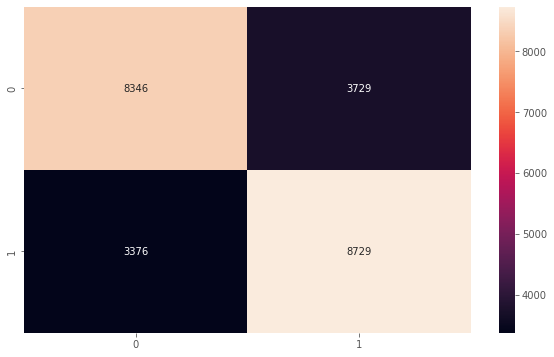

In [119]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions_log_model),annot=True,fmt='d')
plt.show()

## CLASSIFICATION REPORT - LOGISTIC REGRESSION MODEL

In [120]:
print(classification_report(y_test,predictions_log_model))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70     12075
           1       0.70      0.72      0.71     12105

    accuracy                           0.71     24180
   macro avg       0.71      0.71      0.71     24180
weighted avg       0.71      0.71      0.71     24180



# ROC CURVE - LOGISTIC REGRESSION

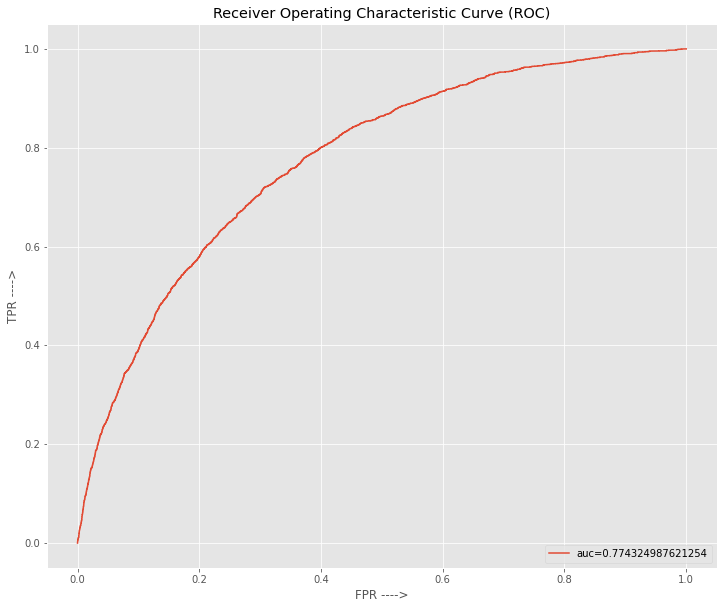

In [121]:
from sklearn.metrics import roc_curve,roc_auc_score

#ROC CURVE
y_pred_prob = log_model.predict_proba(test_ss)[::,1] #probabilities of target coming as 1

fpr,tpr,det = roc_curve(y_test,y_pred_prob) #fpr , tpr and other detail values

auc = roc_auc_score(y_test,y_pred_prob) #Area under the curve for our model

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# DECISION TREE MODEL

In [122]:
from sklearn.tree import DecisionTreeClassifier

#Initializing decision tree classifier
dt = DecisionTreeClassifier(random_state=1)

**USING DEFAULT PARAMETERS**

In [123]:
#FITTING ON TRAINING DATA
dt.fit(train_ss,y_train)

#PREDICTIONS FOR TRAINING DATA
pred_tree_train = dt.predict(train_ss)

#PREDICTIONS FOR TESTING SET
pred_tree = dt.predict(test_ss)

#ACCURACY SCORES
print("TRAINING SCORE FOR DECISION TREE MODEL :",accuracy_score(y_train,pred_tree_train))
print("TESTING SCORE FOR DECISION TREE MODEL :",accuracy_score(y_test,pred_tree))



TRAINING SCORE FOR DECISION TREE MODEL : 1.0
TESTING SCORE FOR DECISION TREE MODEL : 0.9661290322580646


**OPTIMIZING HYPERPARAMETERS USING GRIDSEARCHCV**

In [125]:
from sklearn.model_selection import GridSearchCV
param_dict = {'max_depth':range(20,25),
              'criterion':["gini","entropy"],
              'max_leaf_nodes':range(995,1000)}                                               
                                                                                        
grid = GridSearchCV(dt,param_grid=param_dict,cv=10,n_jobs=-1)

grid.fit(train_ss,y_train)
print(f"Best parameters are : {grid.best_params_}")

Best parameters are : {'criterion': 'gini', 'max_depth': 22, 'max_leaf_nodes': 999}


In [126]:
dt.set_params(criterion='gini',max_depth=22,max_leaf_nodes=999)

DecisionTreeClassifier(max_depth=22, max_leaf_nodes=999, random_state=1)

In [127]:
#FITTING ON TRAINING DATA
dt.fit(train_ss,y_train)
#PREDICTIONS FOR TRAINING SET - 2 PARAMETERS
p2train_dt = dt.predict(train_ss)

#PREDICTIONS FOR TEST SET - 2 PARAMETERS
p2test_dt = dt.predict(test_ss)

#ACCURACY SCORES
print("Training score :",accuracy_score(y_train,p2train_dt))
print("Testing score :",accuracy_score(y_test,p2test_dt))

Training score : 0.9365273494274877
Testing score : 0.9102977667493797


In [128]:
print(confusion_matrix(y_test,p2test_dt))

[[10174  1901]
 [  268 11837]]


In [129]:
print(classification_report(y_test,p2test_dt))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     12075
           1       0.86      0.98      0.92     12105

    accuracy                           0.91     24180
   macro avg       0.92      0.91      0.91     24180
weighted avg       0.92      0.91      0.91     24180



# ROC - DECISION TREE

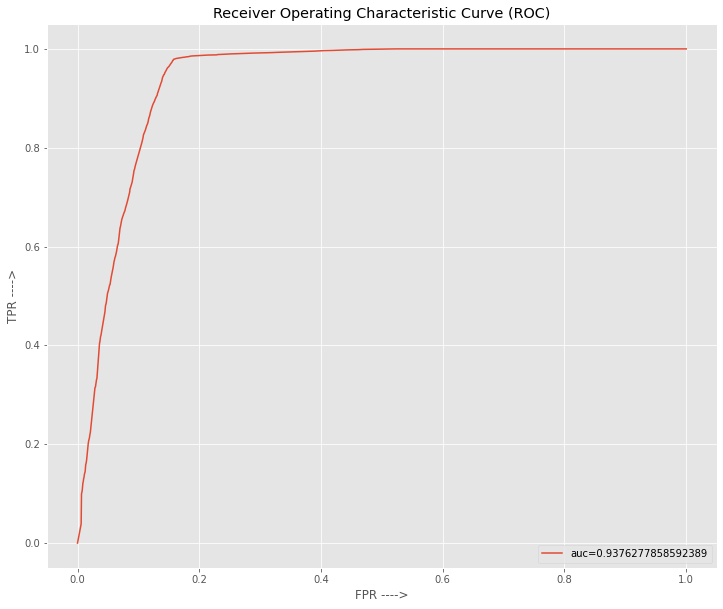

In [130]:
y_pred_prob_dt = dt.predict_proba(test_ss)[::,1] #probabilities of target coming as 1

fpr,tpr,det = roc_curve(y_test,y_pred_prob_dt) #fpr , tpr and other detail values

auc = roc_auc_score(y_test,y_pred_prob_dt) #Area under the curve for our model

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

**KNN MODEL**

In [131]:
from sklearn.neighbors import KNeighborsClassifier

In [132]:
knn = KNeighborsClassifier(n_neighbors=3)

**USING DEFAULT PARAMETERS**

In [133]:
knn.fit(train_ss,y_train)

#PREDICTIONS FOR TRAINING SET
pred_knn_train = knn.predict(train_ss)

#PREDICTIONS FOR TEST SET
pred_knn = knn.predict(test_ss)

#ACCURACY SCORES
print("TRAINING SCORE FOR KNN MODEL :",accuracy_score(y_train,pred_knn_train))
print("TESTING SCORE FOR KNN MODEL :",accuracy_score(y_test,pred_knn))


TRAINING SCORE FOR KNN MODEL : 0.960101386082456
TESTING SCORE FOR KNN MODEL : 0.9290736145574855


**CHECKING FOR BEST K-VALUE**

In [135]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,train_ss,y_train,cv=10)
    accuracy_rate.append(score.mean())
    
print(accuracy_rate)

[0.956432393083982, 0.9557765878407952, 0.9212840158908975, 0.9199014802811316, 0.8910809010170825, 0.8883867360687416, 0.8657875057789852, 0.8610195986856496, 0.841433631987812, 0.8374100223706507, 0.8209436331120316, 0.8180544704193565, 0.8054521823025462, 0.802244078067971, 0.7929739919429462, 0.7939311464821699, 0.7863803371288889, 0.7898190760523566, 0.7842180399102359, 0.7883479193862276, 0.7838635336905491, 0.7873552064532844, 0.7829771220367718, 0.7855295309993344, 0.7797689361093241, 0.7802829947928334, 0.7768267013279051, 0.776702603570695, 0.7727676872766682, 0.7723777357764697, 0.7699317286381465, 0.7692582431721567, 0.7663513185638067, 0.7664932096570276, 0.7632850300136471, 0.7643485266784728, 0.7608921609467727, 0.761228942955187, 0.7585702044351563]


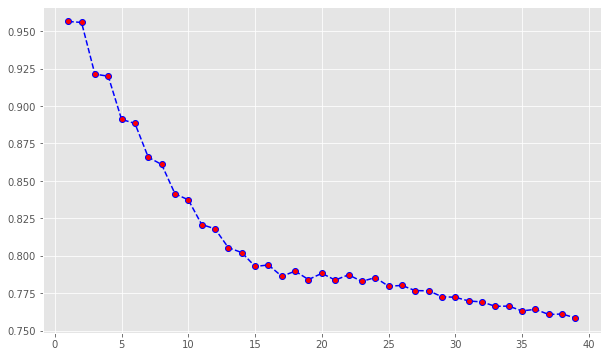

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,'b--o',markerfacecolor='red')

**FOR NEIGHBORS=4**

In [145]:
knn = KNeighborsClassifier(n_neighbors=4) #Initializing model
knn.fit(train_ss,y_train)


#PREDICTIONS FOR TRAINING SET
p2_knn_train = knn.predict(train_ss)

#PREDICTIONS FOR TESTING SET
p2_knn_test = knn.predict(test_ss)

#ACCURACY SCORES
print("TRAINING DATA :",accuracy_score(y_train,p2_knn_train))
print("TESTING DATA :",accuracy_score(y_test,p2_knn_test))



TRAINING DATA : 0.9599773122053246
TESTING DATA : 0.9280397022332506


In [141]:
cm_knn = confusion_matrix(y_test,p2_knn_test)
print(cm_knn)



[[10373  1702]
 [   38 12067]]


In [143]:
cr_knn = classification_report(y_test,p2_knn_test)
print(cr_knn)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     12075
           1       0.88      1.00      0.93     12105

    accuracy                           0.93     24180
   macro avg       0.94      0.93      0.93     24180
weighted avg       0.94      0.93      0.93     24180



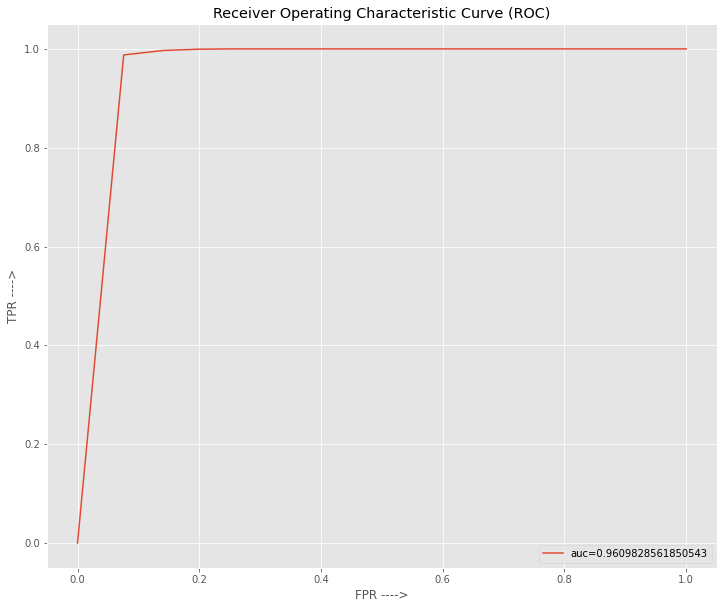

In [144]:
y_pred_prob_knn = knn.predict_proba(test_ss)[::,1] #probabilities of target coming as 1

fpr,tpr,det = roc_curve(y_test,y_pred_prob_knn) #fpr , tpr and other detail values

auc = roc_auc_score(y_test,y_pred_prob_knn) #Area under the curve for our model

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# NAIVE BAYES MODEL

In [146]:
from sklearn.naive_bayes import GaussianNB

#INITIALIZING NAIVE BAYES
gc = GaussianNB() 

In [147]:
#FITTING TRAINING DATA
gc.fit(train_ss,y_train)

#PREDICTIONS ON TRAINING DATA
pred_nb_train = gc.predict(train_ss)

#PREDICTIONS ON TEST DATA
pred_nb = gc.predict(test_ss)

#ACCURACY SCORES
print("TRAINING SCORE FOR NB MODEL :",accuracy_score(y_train,pred_nb_train))
print("TESTING SCORE FOR NB MODEL :",accuracy_score(y_test,pred_nb))




TRAINING SCORE FOR NB MODEL : 0.6841965330213762
TESTING SCORE FOR NB MODEL : 0.6832919768403639


# CONFUSION MATRIX - NAIVE BAYES

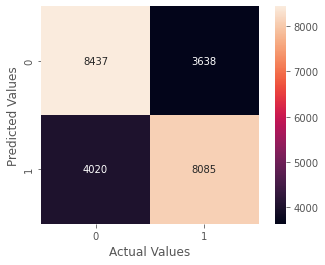

In [148]:
cm = confusion_matrix(y_test,pred_nb)
sns.heatmap(cm,annot=True,square=True,fmt='d')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [149]:
cr = classification_report(y_test,pred_nb)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.70      0.69     12075
           1       0.69      0.67      0.68     12105

    accuracy                           0.68     24180
   macro avg       0.68      0.68      0.68     24180
weighted avg       0.68      0.68      0.68     24180



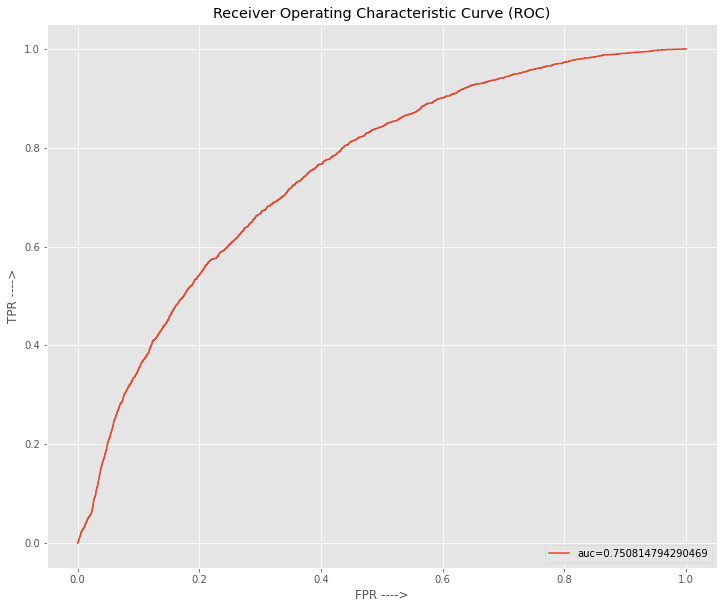

In [182]:
y_pred_prob_knn = gc.predict_proba(test_ss)[::,1] #probabilities of target coming as 1

fpr,tpr,det = roc_curve(y_test,y_pred_prob_knn) #fpr , tpr and other detail values

auc = roc_auc_score(y_test,y_pred_prob_knn) #Area under the curve for our model

plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rf_model = RandomForestClassifier(random_state=40)


**USING DEFAULT PARAMETERS**

In [152]:
#FITTING ON TRAINING DATA
rf_model.fit(train_ss,y_train)

#PREDICTIONS - TRAINING SET
pred_rf_train = rf_model.predict(train_ss)

#PREDICTIONS - TESTING SET
pred_rf = rf_model.predict(test_ss)

#ACCURACY SCORES
print("TRAINING SCORE FOR RF MODEL :",accuracy_score(y_train,pred_rf_train))
print("TESTING SCORE FOR RF MODEL :",accuracy_score(y_test,pred_rf))



TRAINING SCORE FOR RF MODEL : 1.0
TESTING SCORE FOR RF MODEL : 0.9911910669975186


**HYPERPARAMETER TUNING USING GRIDSEARCH CV**

In [154]:
#Will be checked for the combination of all these parameters
param_dict = {'max_depth':[10,12,14,15],
             'bootstrap':[True,False],
             'max_features':['auto','sqrt','log2',None],
             'criterion':['gini','entropy']}

#Setting up GridSearchCV for K = 10
cv_rf = GridSearchCV(rf_model,cv=10,param_grid=param_dict,n_jobs=-1)

#Fitting training data to GridSearchCV
cv_rf.fit(train_ss,y_train)
print(f"Best parameters are : {cv_rf.best_params_}")


**BEST N_ESTIMATORS VALUE WITH LOWEST OOB ERROR RATE**

In [ ]:
rf_model.set_params(criterion='gini',max_depth=12,oob_score=True,warm_start=False)

min_estimators = 500
max_estimators = 1500

error_rate = {}

for i in range(min_estimators,max_estimators+1):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(train_ss,y_train)
    
    oob_error = 1-rf_model.oob_score_
    error_rate[i] = oob_error

oob_series = pd.Series(error_rate)

fig,ax = plt.subplots(figsize=(10,6))


oob_series.plot(kind='line',color='red')
plt.axhline(0.035,color='blue',linestyle='--') #Horizontal axis line for error = 0.035
plt.axhline(0.04,color='blue',linestyle='--') #Horizontal axis line for error = 0.04
plt.xlabel("Number of Trees")
plt.ylabel("Error Rate")
plt.title("OOB Error rate across various forest sizes \n(From 15 to 1000 trees)")
plt.show()


In [155]:
rf_model.set_params(criterion='gini',max_depth=12,n_estimators=1000)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=40)

In [156]:
#FITTING ON TRAINING DATA
rf_model.fit(train_ss,y_train)

#PREDICTIONS - TRAINING SET
p2_rf_train = rf_model.predict(train_ss)

#PREDICTIONS - TESTING SET
p2_rf_test = rf_model.predict(test_ss)

#ACCURACY SCORES
print("TRAINING SCORE FOR RF MODEL :",accuracy_score(y_train,p2_rf_train))
print("TESTING SCORE FOR RF MODEL :",accuracy_score(y_test,p2_rf_test))


TRAINING SCORE FOR RF MODEL : 0.9465241589563614
TESTING SCORE FOR RF MODEL : 0.9320099255583126


In [158]:
rf_model.set_params(warm_start=True,oob_score=False)
rf_model.fit(train_ss,y_train)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=40,
                       warm_start=True)

In [159]:
def variable_importance(model):
    
    """
    Purpose
    -------
    
    Checks if model is fitted CART model and then produces variable importance
    and respective indices in dictionary.
    
    
    Parameters
    ----------
    *fit -: Fitted model containing the attribute feature_importances_
    
    Returns
    -------
    Dictionary containing arrays with importance score and Index of columns 
    ordered in descending order of importance.
    
    """
    
    try:
        if not hasattr(model,"fit"): #If model do not contains the fit property
            return print("'{}' [is not an instantiated model from sci-kit learn]".format(model))
        
        if not vars(model)["estimators_"]: #Checking whether dict attribute of the model contains estimators key or
                                           #Checking whether the model has been trained
                return print("Model does not appear to be trained")
            
    except KeyError:
        print("Model entered does not contain 'estimators_' property")
        
        
    importances = model.feature_importances_  #Storing  an array of variable importance score into importances 
    indices = np.argsort(importances)[::-1]  #Storing the index positions of importances array in descending order
    
    return {'importance':importances,'index':indices}

In [160]:
var_imp = variable_importance(rf_model)

importances_model = var_imp['importance'] #Importance score values
indices_importances = var_imp['index']

print(var_imp)


{'importance': array([0.11465129, 0.05088349, 0.01596818, 0.03993626, 0.09874942,
       0.08031299, 0.06015042, 0.03216464, 0.05457201, 0.03842657,
       0.1470689 , 0.06135316, 0.03218223, 0.10950077, 0.01347335,
       0.05060631]), 'index': array([10,  0, 13,  4,  5, 11,  6,  8,  1, 15,  3,  9, 12,  7,  2, 14])}


In [161]:
names_index = train_ss.columns
print(list(names_index))

['user_id', 'vehicle_model_id', 'travel_type_id', 'from_area_id', 'online_booking', 'from_lat', 'from_long', 'Booking_dow', 'Booking_hour', 'Booking_minutes', 'Month', 'Day of Month', 'Day of Week', 'Hour', 'Minutes', 'Days_difference']


In [162]:
indices_importances.shape

(16,)

In [163]:
def print_var_importance(importance,indices,names_index):
    
    """
    Purpose
    ------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART Model
    
    Parameters
    ----------
    * importance --> Array returned from featur_importances_ for CART 
                     models organized by dataframe index.
                    
    * indices -->   Organized index of dataframe in descending order based on 
                    importance score.
                    
    * names_index --> Nmae of the columns included in the model
    
    Returns
    -------
    Prints feature importances in descending order
    
    """
    
    print("Featue Ranking :")
    
    for f in range(0,indices.shape[0]) : #Range from 0 to total number of index positions (In this case 15)
        i = f #Putting value of f in i
        print("{0}. Feature '{1}' has a mean Decrease in Impurity of {2:.5f}".format(f+1,names_index[indices[i]],
                                                                                    importance[f]))


In [164]:
print_var_importance(importances_model,indices_importances,names_index)

Featue Ranking :
1. Feature 'Month' has a mean Decrease in Impurity of 0.11465
2. Feature 'user_id' has a mean Decrease in Impurity of 0.05088
3. Feature 'Hour' has a mean Decrease in Impurity of 0.01597
4. Feature 'online_booking' has a mean Decrease in Impurity of 0.03994
5. Feature 'from_lat' has a mean Decrease in Impurity of 0.09875
6. Feature 'Day of Month' has a mean Decrease in Impurity of 0.08031
7. Feature 'from_long' has a mean Decrease in Impurity of 0.06015
8. Feature 'Booking_hour' has a mean Decrease in Impurity of 0.03216
9. Feature 'vehicle_model_id' has a mean Decrease in Impurity of 0.05457
10. Feature 'Days_difference' has a mean Decrease in Impurity of 0.03843
11. Feature 'from_area_id' has a mean Decrease in Impurity of 0.14707
12. Feature 'Booking_minutes' has a mean Decrease in Impurity of 0.06135
13. Feature 'Day of Week' has a mean Decrease in Impurity of 0.03218
14. Feature 'Booking_dow' has a mean Decrease in Impurity of 0.10950
15. Feature 'travel_type_id' 

In [165]:
def plot_var_imp(importance,indices,names_index):
    
    """
    Purpose
    -------
    
    Prints bar chart detailing variable importance for CART Model
    
    Note: Feature_space list was created beacause the bar chart was transposed and index
          would be in incorrect order
          
    
    Parameters
    ----------
    *importances : Array returned from feature_importances_ for CART Model
    
    *indices : Index positions of dataframe in descending order of feature_importances score
    
    *names_index : Column names used in  the model
    
    
    Returns
    -------
    
    Returns variable importance plot in descending order of scores.
    
    """
    
    index  = np.arange(len(names_index)) #Array of range of values from 0 to names_index
    importance_desc = sorted(importance) #Sorting importance score 
    feature_space = [] #Initialising empty list for features
    
    for i in range(indices.shape[0] -1,-1,-1): # range of i from 30 to 0
        feature_space.append(names_index[indices[i]]) #Appending column names based on ascending order of importance score
        
        
    fig,ax = plt.subplots(figsize=(10,10))

    plt.barh(index,importance_desc,align='center',color="violet")
    plt.title("Feature Importances for Random Forest Model\
    \nBreast Cancer (Diagnostic)")
    plt.yticks(index,feature_space)
    plt.xlim(0,max(importance_desc)+0.01)
    plt.xlabel("Mean Decrease in Impurity")
    plt.ylabel("Feature")
    plt.style.use("ggplot")
    
    plt.show()


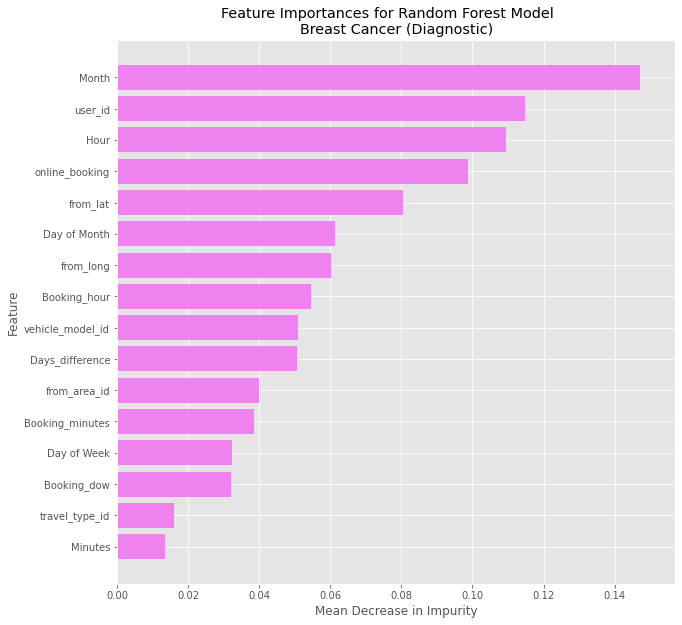

In [166]:
plot_var_imp(importances_model,indices_importances,names_index)

In [167]:
print(confusion_matrix(y_test,p2_rf_test))

[[10864  1211]
 [  433 11672]]


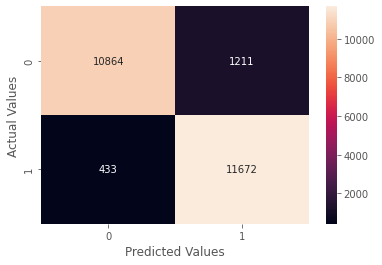

In [168]:
sns.heatmap(confusion_matrix(y_test,p2_rf_test),annot=True,fmt='d')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [169]:
print(classification_report(y_test,p2_rf_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     12075
           1       0.91      0.96      0.93     12105

    accuracy                           0.93     24180
   macro avg       0.93      0.93      0.93     24180
weighted avg       0.93      0.93      0.93     24180



In [170]:
from sklearn.metrics import roc_curve,auc
predict_prob = rf_model.predict_proba(test_ss)[:,1]

fpr,tpr,det = roc_curve(y_test,predict_prob)

auc_score = auc(fpr,tpr)

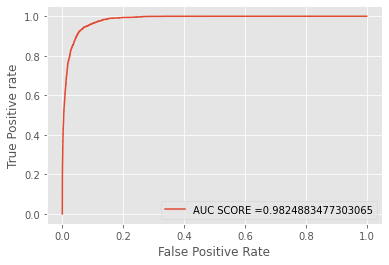

In [171]:
plt.plot(fpr,tpr,label="AUC SCORE ="+str(auc_score))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend()
plt.show()

# SUPPORT VECTOR MACHINE 

In [172]:
from sklearn.svm import SVC

svm = SVC() #INSTANTIATING SVM MODEL

## SVM WITH DEFAULT PARAMETERS

In [173]:
#fitting to training data
svm.fit(train_ss,y_train)

#Predictions for training data
pred_svm_train = svm.predict(train_ss)

#Predictions for test data
pred_svm_test = svm.predict(test_ss)

#ACCURACY SCORES OF TRAINING AND TESTING DATA
print("SVM - Accuracy score - Training data - Default Parameters :",accuracy_score(y_train,pred_svm_train))
print("SVM - Accuracy score - Testing data - Default Parameters :",accuracy_score(y_test,pred_svm_test))

SVM - Accuracy score - Training data - Default Parameters : 0.8396611010670354
SVM - Accuracy score - Testing data - Default Parameters : 0.8295285359801489


**HYPERPARAMETER OPTIMIZATION USING GRIDSEARCHCV**

In [ ]:
param_dict = {'C':(np.arange(1,5)),'kernel':['rbf'],'gamma':[1,2,3,4,5],'degree':[2,3,4,5]}

#Setting up GridSearchCV for K = 10
cv_rf = GridSearchCV(svm,cv=10,param_grid=param_dict,n_jobs=-1)
#Fitting training data to GridSearchCV
svm.fit(train_ss,y_train)
print(f"Best parameters are : {svm.best_params_}")


**OPTIMIZATION OF C ON rbf KERNEL**

In [ ]:
C_range = list(range(1,25))
acc_score = []

for c in C_range:
    svm = SVC(kernel='poly',C=c)
    scores = cross_val_score(svm,train_ss,y_train,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())

print(acc_score)

plt.figure(figsize=(10,6))
C_values = list(range(1,25))

plt.plot(C_values,acc_score)
plt.show()

In [174]:
svm.set_params(kernel='rbf',C=10,gamma='scale')


SVC(C=10)

In [175]:
svm.fit(train_ss,y_train)

#Predictions for training set
p2_svm_train = svm.predict(train_ss)

#Predictions for test set
p2_svm_test = svm.predict(test_ss)

#ACCURACY_SCORES
print("Training score :",accuracy_score(y_train,p2_svm_train))
print("Testing score :",accuracy_score(y_test,p2_svm_test))

Training score : 0.918713885639335
Testing score : 0.896774193548387


<AxesSubplot:>

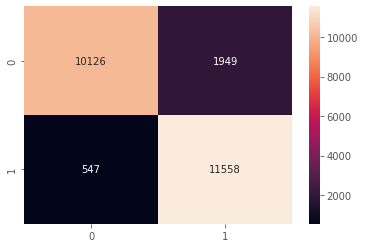

In [178]:
sns.heatmap(confusion_matrix(y_test,p2_svm_test) , annot = True,fmt='d')

In [180]:
print(classification_report(y_test,p2_svm_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     12075
           1       0.86      0.95      0.90     12105

    accuracy                           0.90     24180
   macro avg       0.90      0.90      0.90     24180
weighted avg       0.90      0.90      0.90     24180



**BEST MODEL**

In [184]:
model_data = {'TESTING ACCURACY':[0.71,0.92,0.94,0.68,0.93,0.90],
              'AUC SCORE':[0.77,0.94,0.96,0.75,0.98,None]}

In [185]:
comparison_data = pd.DataFrame(model_data,index=['Logistic Regression','Decision Tree','KNN','Naive Bayes','Random Forest','SVM'])
comparison_data

,TESTING ACCURACY,AUC SCORE
Logistic Regression,0.71,0.77
Decision Tree,0.92,0.94
KNN,0.94,0.96
Naive Bayes,0.68,0.75
Random Forest,0.93,0.98
SVM,0.90,NaN


In [186]:
#BEST MODEL - RANDOM FOREST